# Homework 2

### Load data from mnist using the code below and reduce its size so the homework runs faster.  Only use the first 15000 images for training and 2000 for test.  The MNIST digits from keras datasets are already scaled to a value between 0 and 1 for the greyscale.  You do not need to do any further scaling.

In [1]:
# Keep getting this issue when trying to grab mnist dataset

# fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: 
# None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)

# Turning verification off (generally a bad idea but o well)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.src.callbacks.history import History

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras import layers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images[:15000,:,:]
train_labels = train_labels[:15000]
test_images = test_images[:2000,:,:]
test_labels = test_labels[:2000]
train_images.shape



(15000, 28, 28)

In [3]:
train_images = train_images.reshape((15000, 28 * 28))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((2000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [4]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
train_images.shape

(15000, 784)

# Problem 1
### a) create a sequential model with two dense layers.  The first layer should have 512 neurons.  Use ReLU for the first layers activation.  Pick the best size and activation for the output layer

In [6]:
model = tf.keras.Sequential([
        layers.Input(shape=(784,)),  
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
])

# Problem 1
### b) Compile the model using the rmsprop optimizer.  Use the appropriate loss and metrics for the MNIST classification problem.
### c) Fit the model using 25 epochs, batch size 128 and use 33% of the data for validation (validation_split=0.33).  Save the history into a variable called history.

In [7]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])                     

history = model.fit(train_images, train_labels, 
                    epochs=25, 
                    batch_size=128, 
                    validation_split=0.33) 

Epoch 1/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7533 - loss: 0.8452 - val_accuracy: 0.8631 - val_loss: 0.4238
Epoch 2/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9242 - loss: 0.2624 - val_accuracy: 0.9166 - val_loss: 0.2847
Epoch 3/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9489 - loss: 0.1835 - val_accuracy: 0.9241 - val_loss: 0.2446
Epoch 4/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9597 - loss: 0.1456 - val_accuracy: 0.9301 - val_loss: 0.2358
Epoch 5/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9713 - loss: 0.1059 - val_accuracy: 0.9333 - val_loss: 0.2169
Epoch 6/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9769 - loss: 0.0844 - val_accuracy: 0.9398 - val_loss: 0.2002
Epoch 7/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9848 - loss: 0.0655 - val_accuracy: 0.9436 - val_loss: 0.1921
Epoch 8/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9872 - loss: 0.0507 - val_accuracy: 0.9441 - val_loss:

# Problem 1 
### d) predict the digit for the first ten test images, then compare to the actual values.

In [8]:
predictions = model.predict(test_images[:10])  

y_test_pred = np.argmax(predictions, axis=1)

y_test = test_labels[:10]

pd.DataFrame({
    "Predicted": y_test_pred,
    "Actual": y_test
    }
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


,Predicted,Actual
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,6,5
9,9,9


# Problem 1
### e) Plot out the model accuracy vs epoch for the training and validation data.
### f) Plot the model loss vs epoch for the training and validation data.
### g) Print the model summary
### h) Did the model overfit?  Explain your reasoning.

In [9]:
def plot_results(history: History):
    """
    Plots model accuracy vs epoch AND model loss vs epoch (for train and validation data).
    Args:
        history (Keras History Object): this is the Keras's History object returned when running model.fit()
    Returns:
        None 
    """
    # training & validation accuracy values
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy vs Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(loc='upper left')

    # training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss vs Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()


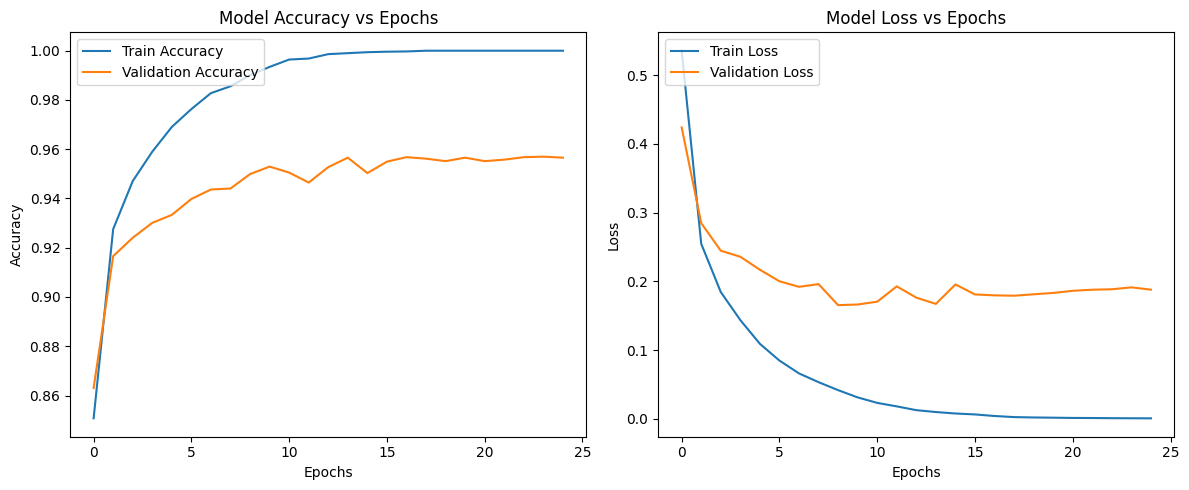

In [10]:
# e/f 
plot_results(history=history)


In [11]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814,102 (3.11 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,052 (1.55 MB)

### Did the model overfit?

On accuracy:
- The training set accuracy increases to a plateau while the validation also increases to a plateau. There is a small gap between the two and the accuracy does trend in the same way between the two.
On loss:
- The training set decreases to a plateau while the validation also decreases to a plateau. There's a decent gap between the two with no significant divergence from one another and the downward trend. 

The train/validation accuracy/losses are pretty stable and are relatively close to one another in trend/value. In addition, specifically for loss, both sets decrease over time which is a good metric for improved learning. Lastly, on divergence of train/validation metrics, we don't see training metrics improve while the validation worsens. Because of these observations, I would say that this model is not overfit and is generalizing pretty well to unseen data. 

# Problem 1
### Part i)  Do four-fold cross validation on the model above and print out the validation accuracy for each fold.  Also, plot the training and validation accuracy per fold.

In [12]:
def create_model():
    """Defines a function to create the model"""
    model = tf.keras.Sequential([
        layers.Input(shape=(784,)),  
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# number of folds
k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# results
fold_train_accuracies = []
fold_val_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(train_images), 1):
    # split data into training and validation sets
    X_train, X_val = train_images[train_index], train_images[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]
    
    # create and train model
    model = create_model()
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    
    # Get final training and validation accuracies
    train_accuracy = history.history['accuracy'][-1]
    val_accuracy = history.history['val_accuracy'][-1]
    
    fold_train_accuracies.append(train_accuracy)
    fold_val_accuracies.append(val_accuracy)
    
    print(f"Fold {fold} - Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

Fold 1 - Training Accuracy: 0.9988, Validation Accuracy: 0.9707
Fold 2 - Training Accuracy: 0.9990, Validation Accuracy: 0.9573
Fold 3 - Training Accuracy: 0.9988, Validation Accuracy: 0.9675
Fold 4 - Training Accuracy: 0.9987, Validation Accuracy: 0.9659


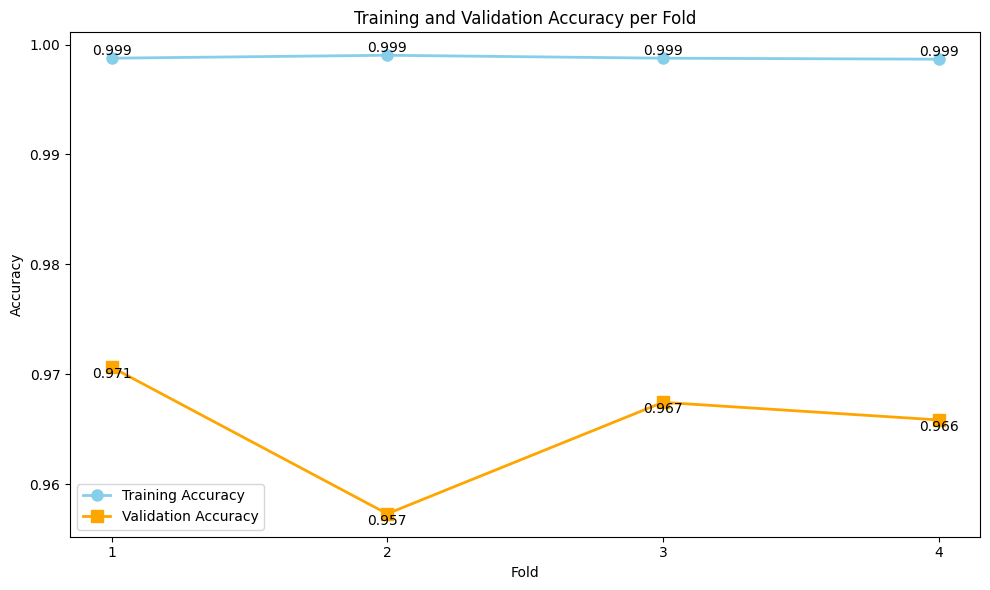

In [13]:
# plot train/validation accuracy per fold
# k = 4 defined above
# train/validat scored defined above

plt.figure(figsize=(10, 6))
x = np.arange(1, k+1) 

plt.plot(x, fold_train_accuracies, marker='o', linestyle='-', linewidth=2, markersize=8, label='Training Accuracy', color='skyblue')
plt.plot(x, fold_val_accuracies, marker='s', linestyle='-', linewidth=2, markersize=8, label='Validation Accuracy', color='orange')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Fold')
plt.xticks(x)
plt.legend()

# add point values
for i, (train_acc, val_acc) in enumerate(zip(fold_train_accuracies, fold_val_accuracies)):
    plt.text(i+1, train_acc, f'{train_acc:.3f}', ha='center', va='bottom')
    plt.text(i+1, val_acc, f'{val_acc:.3f}', ha='center', va='top')

plt.tight_layout()
plt.show()

# Problem 2
### For problem 2, we are going to make a binary classifier using the same MNIST dataset.  We are going to classify digits as zero or not zero.
### a) Make the train_labels and test_labels data be zero or one with one being all digits that are not a zero (digits 1 - 9).

In [14]:
train_labels_0 = np.where(train_labels == 0, 0, 1)  # 0 if train_label == 0 else 1
test_labels_0 = np.where(test_labels == 0, 0, 1)    

# Problem 2
### b) Create a model with one dense layer and one neuron.  Choose the appropriate activation for binary classification.

In [15]:
binary_model = tf.keras.Sequential([
        layers.Input(shape=(784,)),  
        layers.Dense(1, activation='sigmoid')
])    

# Problem 2
### c) Compile the model using rmsprop for the optimizer.  Choose the best loss and metrics for binary classification

In [16]:
binary_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Problem 2
### d) Fit the model and use the test_images and test_labels for the validation data instead of doing a validation split on the training data.  Use 50 epochs and the proper loss and metrics for a binary classification problem.

In [17]:
binary_history = binary_model.fit(train_images, train_labels_0,
          epochs=50,
          validation_data=(test_images, test_labels_0))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - accuracy: 0.9412 - loss: 0.2011 - val_accuracy: 0.9850 - val_loss: 0.0497
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.9867 - loss: 0.0463 - val_accuracy: 0.9875 - val_loss: 0.0357
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.9885 - loss: 0.0388 - val_accuracy: 0.9890 - val_loss: 0.0329
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.9895 - loss: 0.0300 - val_accuracy: 0.9895 - val_loss: 0.0318
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.9889 - loss: 0.0321 - val_accuracy: 0.9895 - val_loss: 0.0293
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.9894 - loss: 0.0329 - val_accuracy: 0.9910 - val_loss: 0.0284
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.9897 - loss: 0.0287 - val_accuracy: 0.9920 - val_loss: 0.0283
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.9908 - loss: 0.0261 - 

# Problem 2
### e) Plot out the model accuracy vs epoch for the traning and validation data.
### f) Plot the model loss vs epoch for the training and validation data.
### g) print the model summary
### h) Did the model overfit?  Explain your reasoning.

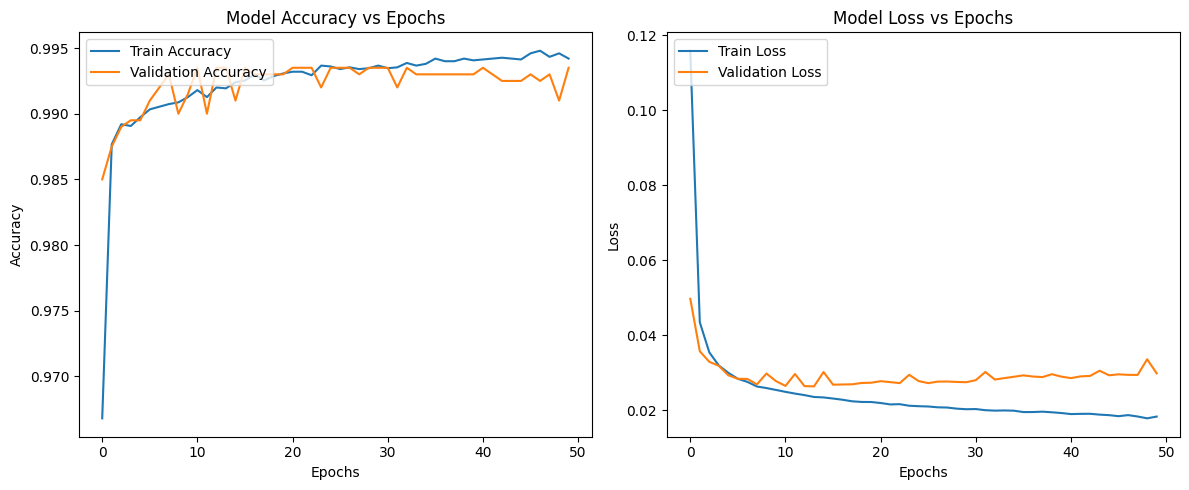

In [18]:
plot_results(history=binary_history)

In [19]:
binary_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,572 (6.14 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 787 (3.08 KB)

### Did the model overfit?

On accuracy:
- The training set accuracy is consistent around 0.912 and the validation set accuracy is consistent around 0.9. 
- The accuracy for validation starts off higher than the training set and then gets worse 
- Accuracy for both validation/training closely mirror one another

On loss:
- The training set decreases to linearly from around 900 to 700 while the validation set decreases lineraly from about 675 to 500 but then increases slightly
- There's a very small gap between the two with no significant divergence from one another and the downward trend. 

The train/validation accuracy/losses are fairly close to one another in trend/value and almost mirror one another. Validation accuracy starts off better than the training set and then decreases. Validation loss improves and then gets worse. Because of these observations, I would say that this model is overfitting and is not generalizing pretty well to unseen data. 

This is fairly expected because we used the test set as the validation set which is problematic since the model training involves the test set. When predicting on the test set, we would expect a really high prediction score. This may seem like a great thing, but the model will not perform well to unseen data. 